<a href="https://colab.research.google.com/github/pahrul23/pahrul-skripsi/blob/main/Hasil_dan_Pembahasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pandas as pd

# Membaca data dari file csv
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/indodanaPrediksi_with_sentiment.csv')

In [60]:
df

,userName,score,at,content,sentimentSVM,sentimentXGB,sentimentRF,sentimentSV
0,Rhegita Arrum Syafitri,5,2023-03-23 13:39:52,bagusss,2,2,0,Negative
1,Yusmanda Asmara,4,2023-03-23 13:30:36,mantap,2,1,1,Positive
2,tomi tulus,3,2023-03-23 13:24:14,untuk saat ini kasih bintang dlu kalau udah da...,2,0,1,Positive
3,Ariscaryana Ryana,3,2023-03-23 13:16:46,semoga d acc ya,2,2,1,Negative
4,LYANDIJAYAMAULANA,5,2023-03-23 13:16:18,saya pinjam jta kok cair nya jta saya mau kemb...,2,2,2,Neutral
...,...,...,...,...,...,...,...,...
9995,Imam Bukhori,5,2023-02-26 17:23:10,mantaf,2,2,2,Neutral
9996,Tisna Joe,5,2023-02-26 17:21:05,mudah dan cepat,2,0,2,Neutral
9997,Gabriella Wibowo,5,2023-02-26 17:19:57,bagus,2,2,1,Negative
9998,PRIVATE NUMBER,5,2023-02-26 17:19:08,semoga bisa membantu,0,0,0,Neutral


            sentimentSVM
at                      
2023-02-26            71
2023-02-27           619
2023-02-28           723
2023-03-01           618
2023-03-02           550
2023-03-03           632
2023-03-04           634
2023-03-05           599
2023-03-06           610
2023-03-07           634
2023-03-08           671
2023-03-09           628
2023-03-10           567
2023-03-11           464
2023-03-12           449
2023-03-13           559
2023-03-14           603
2023-03-15           646
2023-03-16           697
2023-03-17           570
2023-03-18           515
2023-03-19           490
2023-03-20           580
2023-03-21           551
2023-03-22           481
2023-03-23           332


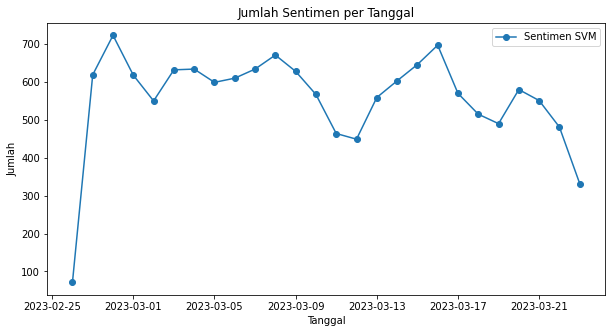

In [44]:
# Mengubah tipe data kolom 'at' menjadi datetime
df['at'] = pd.to_datetime(df['at']).dt.date

# Menghitung jumlah sentimen berdasarkan tanggal
df_sentiment = df.groupby('at')[['sentimentSVM']].sum()

# Menghitung jumlah sentimen berdasarkan tanggal dan kelas
df_sentiment_class = df.groupby(['at', 'sentimentSVM']).size().unstack(fill_value=0)

# Print jumlah sentimen berdasarkan tanggal
print(df_sentiment)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))

# Memplot data
ax.plot(df_sentiment.index, df_sentiment['sentimentSVM'], marker='o', label='Sentimen SVM')

# Menambahkan label pada sumbu-sumbu dan judul
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Sentimen per Tanggal')

# Menambahkan legend
ax.legend()

# Menampilkan plot
plt.show()

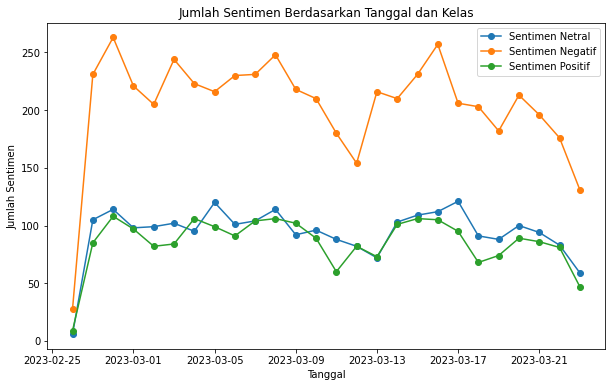

In [61]:
# Mengubah kolom 'at' menjadi tipe datetime
df['at'] = pd.to_datetime(df['at'])

# Mengubah kolom 'at' menjadi indeks dataframe
df = df.set_index('at')

# Menghitung jumlah sentimen berdasarkan kelas 0, 1, dan 2 pada setiap tanggal
sentimen_count = pd.pivot_table(df, values='sentimentSV', index=df.index.date, columns=df['sentimentRF'], aggfunc='count', fill_value=0)

# Mengubah nama kolom dari angka ke string
sentimen_count.columns = ['Sentimen Netral', 'Sentimen Negatif', 'Sentimen Positif']

# Membuat plot jumlah sentimen berdasarkan tanggal dan kelas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sentimen_count.index, sentimen_count['Sentimen Netral'], marker='o', label='Sentimen Netral')
ax.plot(sentimen_count.index, sentimen_count['Sentimen Negatif'], marker='o', label='Sentimen Negatif')
ax.plot(sentimen_count.index, sentimen_count['Sentimen Positif'], marker='o', label='Sentimen Positif')

# Menambahkan judul dan label sumbu pada plot
ax.set_title('Jumlah Sentimen Berdasarkan Tanggal dan Kelas')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Sentimen')
ax.legend()

# Menampilkan plot
plt.show()

In [63]:
sentimen_count

,Sentimen Netral,Sentimen Negatif,Sentimen Positif
2023-02-26,6,28,9
2023-02-27,105,231,85
2023-02-28,114,263,108
2023-03-01,98,221,97
2023-03-02,99,205,82
2023-03-03,102,244,84
2023-03-04,95,223,106
2023-03-05,120,216,99
2023-03-06,101,230,91
2023-03-07,104,231,104


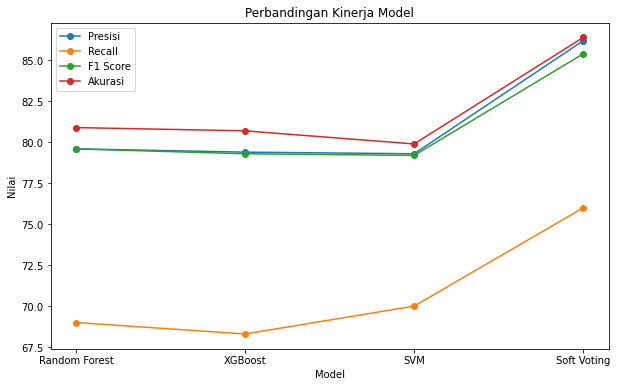

In [52]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'XGBoost', 'SVM', 'Soft Voting']
presisi = [79.6, 79.4, 79.3, 86.2]
recall = [69.0, 68.3, 70.0, 76.0]
f1_score = [79.6, 79.3, 79.2, 85.4]
akurasi = [80.9, 80.7, 79.9, 86.4]

# Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot
ax.plot(models, presisi, marker='o', label='Presisi')
ax.plot(models, recall, marker='o', label='Recall')
ax.plot(models, f1_score, marker='o', label='F1 Score')
ax.plot(models, akurasi, marker='o', label='Akurasi')

# Title and Legend
ax.set_title('Perbandingan Kinerja Model')
ax.legend()

# Axis Label
ax.set_xlabel('Model')
ax.set_ylabel('Nilai')

# Show
plt.show()
